# Support Vector Regression (SVR)

## Importing the libraries

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [233]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
# Reshape y into 10 rows with 1 column
y = y.reshape(len(y),1)

## Feature Scaling

In [234]:
from sklearn.preprocessing import StandardScaler

# Create two Scaler objects which we will use to perform scaling of each dataset
# We use two Scaler objects because once we fit the dataset it will calculate the std for the first, and we
# cannot use that std on the second dataset. We need to calculate its' own std.
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## Training the SVR model on the whole dataset

In [235]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y.ravel())

SVR()

## Predicting a new result

In [236]:
# Inverse_transform requires a 1d array
sc_y.inverse_transform([regressor.predict(sc_X.transform([[20]]))])

array([[252790.77239066]])

## Visualising the SVR results

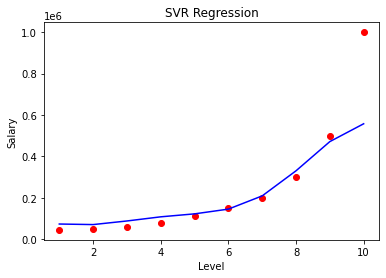

In [237]:
# since we are calculating another array that wasn't reshaped 'X' we will need to reshape it to a [10, 1]
y_pred = sc_y.inverse_transform([regressor.predict(X)]).reshape(len(X), 1)

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), y_pred, color = 'blue')
plt.title('SVR Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

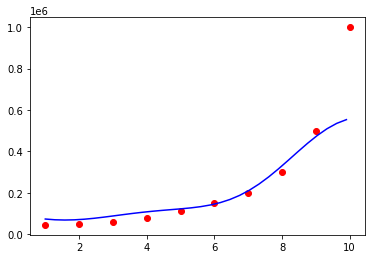

In [242]:
# Create an array from 'X' minimum to 'X' maximum with a step of 0.1
X_grid = np.arange(min(X), max(X), 0.1)
# Reshape the array so it has 1 column
X_grid = X_grid.reshape(len(X_grid), 1)
# Rescale the data back to its original form
X_grid_inverse = sc_X.inverse_transform(X_grid)

# Create our 'y' variable using the higher resolution 'X' array
y_pred = regressor.predict(X_grid)
# Reshape the array so it has 1 column
y_pred = y_pred.reshape(len(y_pred), 1)
# # Rescale the data back to its original form
y_pred = sc_y.inverse_transform(y_pred)

# Plot the original 'X' and 'y' datasets
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
# Plot the higher resolution SVR
plt.plot(X_grid_inverse, y_pred, color = 'blue')